#    #DSC 478 ASSIGNMENT2 - SYED NOOR RAZI ALI 2070326
    

QUESTION 1
A.
[5 pts] Load the data sets, including the train and test matrices as well as the train and test labels. Show the top 20 terms in the decreasing order of total training frequency (total number of occurences of the term across all documents in the training data). Then plot the distribtution of term frequencies in the training data (using a line plot similar to class examples).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# loading the dataset
train_data = pd.read_table("D:/DEPAUL MS DATA SCIENCE/DSC 478 Programming Machine learning/ass 2/newsgroups/trainMatrixModified.txt", header = None)
test_data = pd.read_table("D:/DEPAUL MS DATA SCIENCE/DSC 478 Programming Machine learning/ass 2/newsgroups/testMatrixModified.txt", header = None)
trainlables = pd.read_table("D:/DEPAUL MS DATA SCIENCE/DSC 478 Programming Machine learning/ass 2/newsgroups/trainClasses.txt",header = None, index_col=0)
testlables = pd.read_table("D:/DEPAUL MS DATA SCIENCE/DSC 478 Programming Machine learning/ass 2/newsgroups/testClasses.txt",header = None, index_col=0)
terms = pd.read_table("D:/DEPAUL MS DATA SCIENCE/DSC 478 Programming Machine learning/ass 2/newsgroups/modifiedterms.txt", header = None)

In [3]:
# checking the shape of the test data
test_data.shape

(5500, 200)

In [4]:
## checking the shape of the train data
train_data.shape

(5500, 800)

In [5]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
testlables.shape

(200, 1)

In [7]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,2.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [8]:
trainlables.shape

(800, 1)

In [9]:
DT_train = train_data.T
DT_test = test_data.T

In [10]:
termFreqs = train_data.sum(axis=1)
termFreqs[0:20]

0     102.0
1      11.0
2      22.0
3     959.0
4     222.0
5      84.0
6     108.0
7     262.0
8      55.0
9     318.0
10     69.0
11     41.0
12    148.0
13    128.0
14    128.0
15    146.0
16    201.0
17     39.0
18    159.0
19      6.0
dtype: float64

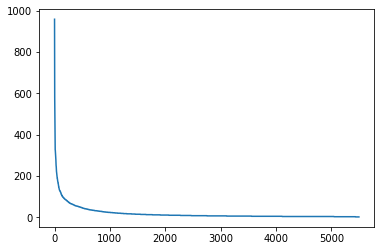

In [11]:
plt.plot(sorted(termFreqs, reverse = True));

# QUESTION 1b


[10 pts] Create your own K-Nearest-Neighbor classifier function. Your classifier should allow as input the training data matrix, the training labels, the instance to be classified, the value of K (number of neighbors), and should return the predicted class for the instance and the indices of the top K neighbors. Your classifier should work with Euclidean distance as well as Cosine distance (which is 1 minus the Cosine similarity). You may create two separate classifiers, or add the distance metric as a parameter in the classifier function (an example implementation of a KNN classifier was provided in class examples). Show that your classifier works by running it on the first two instances in the test data using both Cosine and Euclidean distance in each case.

In [12]:
def knn_search(x, D, K, measure):
    """ find K nearest neighbors of an instance x among the instances in D """
    if measure == 0:
        # euclidean distances from the other points
        dist = np.sqrt(((D - x)**2).sum(axis=1))
    elif measure == 1:
        # first find the vector norm for each instance in D as wel as the norm for vector x
        D_norm = np.array([np.linalg.norm(D[i]) for i in range(len(D))])
        x_norm = np.linalg.norm(x)
        # Compute Cosine: divide the dot product o x and each instance in D by the product of the two norms
        sims = np.dot(D,x)/(D_norm * x_norm)
        # The distance measure will be the inverse of Cosine similarity
        dist = 1 - sims
    idx = np.argsort(dist) # sorting
    # return the indexes of K nearest neighbors
    return idx[:K], dist

In [13]:
def knn_classify(x, D, K, labels, measure):
    from collections import Counter
    neigh_idx, distances = knn_search(x, D, K, measure)
    neigh_labels = labels[neigh_idx]
    count = Counter(neigh_labels)
    predicted_label = count.most_common(1)[0][0]
    return neigh_idx, predicted_label

In [14]:
DT_train = np.array(DT_train)
DT_test = np.array(DT_test)
terms_train = np.array(trainlables).flatten()
terms_test = np.array(testlables).flatten()

In [15]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
train_norm = min_max_scaler.fit_transform(DT_train)
test_norm = min_max_scaler.fit_transform(DT_test)

In [16]:
top_K_neighors, predicted_class = knn_classify(test_norm[0], train_norm, 10, terms_train, 0)
print(top_K_neighors, predicted_class)

[685 757 798 711  38 342 326 224 554 743] 0


In [17]:
print(top_K_neighors, predicted_class)

[685 757 798 711  38 342 326 224 554 743] 0


In [18]:
top_K_neighors, predicted_class = knn_classify(test_norm[1], train_norm,10, terms_train, 0)
print(top_K_neighors, predicted_class)

[757 798 711  38 342 554 326 224 743  20] 0


In [19]:
top_K_neighors, predicted_class = knn_classify(test_norm[1], train_norm,10, terms_train, 1)
print(top_K_neighors, predicted_class)

[587 269 199 779 550 458 461 784 498 686] 0


# QUESTION 1c

Create an evaluation function to measure the accuracy of your classifier. This function will call the classifier function in part a on all the test instances and in each case compares the actual test class label to the predicted class label. It should take as input the training data, the training labels, the test instances, the labels for test instances, and the value of K. Your evaluation function should return the Classification Accuracy (ratio of correct predictions to the number of test instances)

In [20]:
def evaluate_knn(test, test_labs, train, train_labs, K, measure):
    # Inputs:
    # test: an array or list of test instances
    # test_labs: an array or list of class labels for the corresponding test instances in test
    # train: the training instances
    # train_labs: class labels for the corresponding training instances in train
    # K: number of neighbors
    # measure: 0 = Euclidean distance; 1 = Cosine distance

    T=0 # no. of correctly classified instances
    F=0 # no. of incorrectly classified instances
    for i in range(len(test)):
        
        actual=test_labs[i]
        
        top_K_neighbors, predicted = knn_classify(test[i], train, K, train_labs, measure)
        if actual == predicted:
            T += 1       
        else:
            F += 1     
    accuracy = float(T)/float(T+F) 
    return accuracy

In [21]:
accuracy = evaluate_knn(test_norm, terms_test, train_norm, terms_train, 10, 0)
print("Classification accuracy: ", accuracy)

Classification accuracy:  0.525


# 1d.

Run your evaluation function on a range of values for K from 5 to 100 (in increments of 5) in order to compare accuracy values for different numbers of neighbors. Do this both using Euclidean Distance as well as Cosine similarity measure. Present the results as graphs with K in the x-axis and the evaluation metric (accuracy) on the y-axis. Use a single plot to compare the two version of the classifier (Euclidean distance version vs. cosine similarity version)

In [22]:
def incrementK(test, test_labs, train, train_labs):
    accuracyMatrix = np.zeros([20,3])
    index=0
    for K in range(5, 105, 5):
        euclidianAcc= evaluate_knn(test, test_labs, train, train_labs, K, 0)
        cosineAcc = evaluate_knn(test, test_labs, train, train_labs, K, 1)
        accuracyMatrix[index]= [K, euclidianAcc, cosineAcc]
        index +=1
    return accuracyMatrix

In [23]:
accuracyMatrix = incrementK(test_norm, terms_test, train_norm, terms_train )

for row in accuracyMatrix:
    print("%2.0f   %.2f    %.2f" % (row[0], row[1], row[2]))

 5   0.61    0.96
10   0.53    0.96
15   0.51    0.95
20   0.49    0.95
25   0.49    0.94
30   0.49    0.94
35   0.49    0.94
40   0.49    0.94
45   0.49    0.94
50   0.49    0.94
55   0.49    0.94
60   0.49    0.94
65   0.49    0.94
70   0.49    0.94
75   0.49    0.94
80   0.49    0.93
85   0.49    0.93
90   0.49    0.94
95   0.49    0.93
100   0.49    0.93


In [24]:
df = pd.DataFrame(accuracyMatrix, columns = ['K', 'euclidianAcc', 'cosineAcc'])

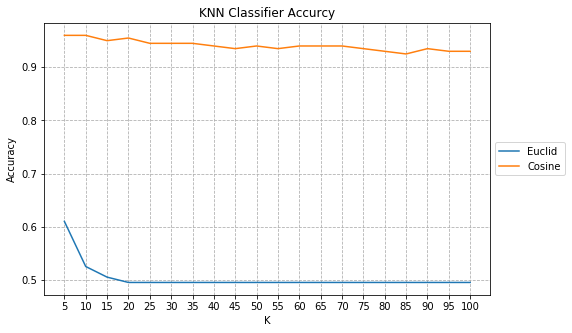

In [25]:
plt.figure(figsize=(8,5))
plt.plot(df['K'], df['euclidianAcc'], label ="Euclid")
plt.plot(df['K'], df['cosineAcc'], label ="Cosine")
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title("KNN Classifier Accurcy")
plt.grid(linestyle = '--')
plt.xticks(df['K'])
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.show()

# 1e

Next, modify the training and test data sets so that term weights are converted to TFxIDF weights (instead of raw term frequencies). [See class notes on Text Categorization]. Then, rerun your evaluation (only for the Cosine similarity version of the classifier) on the range of K values (as above) and create a chart comparing the results with and without using TFxIDF weights

In [26]:
nTerms = DT_train.shape[1]
nTerms

5500

In [27]:
nDocs = DT_train.shape[0]
nDocs

800

In [28]:
# first let's find the doc counts for each term
doc_terms = pd.DataFrame([(DT_train.T!=0).sum(1)]).T
doc_terms

,0
0,50
1,7
2,10
3,800
4,108
...,...
5495,3
5496,3
5497,2
5498,2


In [29]:
#create matrix with all entries = NDocs for Training data 
NMatrix = np.ones(np.shape(DT_train.T), dtype=float)*nDocs
np.set_printoptions(precision=2,suppress=True,linewidth=120)
print(NMatrix)

[[800. 800. 800. ... 800. 800. 800.]
 [800. 800. 800. ... 800. 800. 800.]
 [800. 800. 800. ... 800. 800. 800.]
 ...
 [800. 800. 800. ... 800. 800. 800.]
 [800. 800. 800. ... 800. 800. 800.]
 [800. 800. 800. ... 800. 800. 800.]]


In [30]:
#Convert each entry into IDF values
#First: Divide the NMatrix by numpy array train_df and same for test data
#Second: get log2 of the output
IDF = np.log2(np.divide(NMatrix, np.array(doc_terms)))
print(IDF[0:5])

[[4.   4.   4.   ... 4.   4.   4.  ]
 [6.84 6.84 6.84 ... 6.84 6.84 6.84]
 [6.32 6.32 6.32 ... 6.32 6.32 6.32]
 [0.   0.   0.   ... 0.   0.   0.  ]
 [2.89 2.89 2.89 ... 2.89 2.89 2.89]]


In [31]:
#Compute TF*IDF for test and train data
TD_tfidf = DT_train.T * IDF
pd.set_option("display.precision", 2)
TD_tfidf

array([[ 8.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [13.67,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [12.64,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]])

In [32]:
#The Knn functions require numpy arrays and document by term
DT_tfidf = TD_tfidf.T
dtm_train_idf = np.array(DT_tfidf)
dtm_train_idf

array([[ 8.  , 13.67, 12.64, ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]])

In [33]:
def Knn_Cosine_IncrementK(test, test_labs, train, train_labs):
    accuracyMatrix = np.zeros([20,2])
    index=0
    for K in range(5, 105, 5):
        for i in range(len(test)):
            x_IDF_Test= test[i] * IDF.T[i]
            cosineAcc = knn_evaluate(x_IDF_Test, test_labs, train, train_labs, K, 1)
            accuracyMatrix[index]= [K, cosineAcc]
            index +=1
    return accuracyMatrix

In [34]:
dt_test = np.array(DT_test)
dt_test.shape

(200, 5500)

In [35]:
def knn_evaluate_idf(test_data, test_labels, train_data, train_labels, K, measure):
    correct=0 # no. of correctly classified instances
    total = len(test_data)
    for i in range(total):
        x_tfidf = test_data[i] * IDF.T[i]
        top_K_neighbors, predicted = knn_classify(x_tfidf, train_data, K, train_labels, measure)
        if(test_labels[i] == predicted):
            correct += 1       
         
    accuracy = correct/total
    return accuracy

In [36]:
%%time
cosine=(knn_evaluate_idf(dt_test,  terms_test, dtm_train_idf, terms_train, 10, 1))
print(cosine)

0.99
Wall time: 7.3 s


In [37]:
cosine_idf =[]
for K in range(5, 101, 5):
    cosine_idf.append(knn_evaluate_idf(dt_test,  terms_test, dtm_train_idf, terms_train, K, 1))

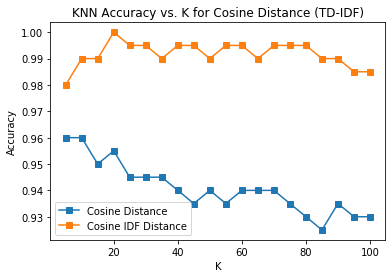

In [38]:
x = accuracyMatrix[:,0]
cosine= accuracyMatrix[:,2]
cosine_reg= accuracyMatrix[2]
plt.plot(x, cosine, label ="Cosine Distance", marker ="s")
plt.plot(x, cosine_idf, label ="Cosine IDF Distance", marker ="s")

plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. K for Cosine Distance (TD-IDF)')
plt.legend(loc="best")
plt.show()

# 1f

Create a new classifier based on the Rocchio Method (also know as the "nearest centroid" method) adapted for text categorization [See class notes on Text Categorization]. You should separate the training function from the classification function. The training part for the classifier can be implemented as a function that takes as input the training data matrix and the training labels, returning the prototype vectors for each class. The classification part can be implemented as another function that would take as input the prototypes returned from the training function and the instance to be classified. This function should measure Cosine similarity of the test instance to each prototype vector. Your output should indicate the predicted class for the test instance and the similarity values of the instance to each of the category prototypes.  Finally, use your evaluation function to compare your results to the best KNN results you obtained in part d. [Note: your functions should work regardless of the number of categories (class labels) and should not be limited to two-class categorization scenario. The number of classes should not be hardcoded in your implementation.]

In [39]:
from numpy import dot
from numpy.linalg import norm

In [40]:
# Creating the training function separate from the classification function 
# that takes as input training data matrix and labels.
# Based on description in lecture slides.
# Couldn't get the entire part of this problem to work as I wasn't able to find anything online or in the example code that could help me in fixing my errors
# In the future I will make a greater effort to do more research for methods not in the example code
def rocchio_training(train_data, train_labels):
    numClass = np.unique(train_labels)
    prototypeVector = {}
    
    # For each class we want to get all of the indexes that match our class then get the rows that pertain to each matched class.
    # Then we add up the rows to get the prototype and add it to our prototype vector
    for (i, cls) in enumerate(numClass):
        indexes = np.array(train_labels.index[train_labels.iloc[:, 0] == cls])
        rows = train_data[indexes]
        prototype = np.sum(rows, axis=0)
        prototypeVector.update({i : prototype})
        
    return prototypeVector

In [41]:
def rocchio_classification(prototypes, instance):
    cosineMax = -1
    proto = -1
    
    # get cosine similarity between prototype and instance then update the cosineMax if greater than current max.
    # Also update the prototype if the cosineMax is updated.
    for k, v in prototypes.items():
        cosine = dot(instance, v)/(norm(instance)*norm(v))
        if cosine > cosineMax:
            cosineMac = cosine
            proto = k
    return proto

In [42]:
# Function to compute the classification accuracy using the test instances
def rocchio_compute(data, labels, prototypes):
    total = len(data)
    corr = 0
    
    for i in range(total):
        label = rocchio_classification(prototypes, data[i])

        if label == labels[i]:
            corr += 1
    print("Correct: {}, Total: {}".format(corr, total))
    return corr/total

In [43]:
prototypes = rocchio_training(DT_train, trainlables)

In [44]:
rocchio_compute(DT_test, terms_test, prototypes)

Correct: 101, Total: 200


0.505

In [45]:
prototypes_idf = rocchio_training(dtm_train_idf, trainlables)

In [46]:
def rocchio_evaluate_idf(data, labels, prototypes):
    total = len(data)
    correct = 0
    
    for i in range(len(data)):
        x_tfidf = data[i] * IDF.T[i]
        label = rocchio_classification(prototypes, x_tfidf)
        if label == labels[i]:
            correct +=1
    print("Correct: {}, Total: {}".format(correct, total))
    return correct/total

In [47]:
rocchio_evaluate_idf(DT_test, terms_test, prototypes_idf)

Correct: 101, Total: 200


0.505

# 1g

[5 pts] Using scikit-learn's Nearest Centroid classifier to perform classification of the test instances, as in the previous part. Compare the classification accuracy of your Rocchio implementation to the classification results using scikit-learn

In [48]:
from sklearn.neighbors import NearestCentroid
clf = NearestCentroid()
clf.fit(DT_train, trainlables)
NearestCentroid()

C:\Users\razia\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


NearestCentroid(metric='euclidean', shrink_threshold=None)

In [49]:
pred = clf.predict(DT_test)

In [50]:
accuracy = clf.score(DT_test, testlables)
print(accuracy)

0.94


# QUESTION 2

Load the data into a Pandas dataframe. Create dummy variables for the categorical attributes so that the data set is fully numeric. Then separate the attribute ("income_>50K") from the remaining attributes; this will be used as the target attribute for classification.  [Note: you need to drop "income_<=50K" which is also created as a dummy variable in earlier step]. Finally, split the transformed data into training and test sets (using 80%-20% randomized split). Note: use the train_test_split function from the sklearn.model_selection module with random_state = 111 to perform the split.

In [51]:
data = pd.read_csv("D:/DEPAUL MS DATA SCIENCE/DSC 478 Programming Machine learning/ass 2/adult-modified.csv")

In [52]:
data.head()

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39,Public,13,Single,White,Male,40,<=50K
1,50,Self-emp,13,Married,White,Male,13,<=50K
2,38,Private,9,Single,White,Male,40,<=50K
3,53,Private,7,Married,Black,Male,40,<=50K
4,28,Private,13,Married,Black,Female,40,<=50K


In [53]:
num_data = pd.get_dummies(data)
num_data.head()

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male,income_<=50K,income_>50K
0,39,13,40,0,1,0,0,1,0,0,0,0,1,0,1,1,0
1,50,13,13,0,0,1,1,0,0,0,0,0,1,0,1,1,0
2,38,9,40,1,0,0,0,1,0,0,0,0,1,0,1,1,0
3,53,7,40,1,0,0,1,0,0,0,1,0,0,0,1,1,0
4,28,13,40,1,0,0,1,0,0,0,1,0,0,1,0,1,0


In [54]:
#Getting the income>50K as tatget variable
data_target = num_data.iloc[:,-1]
data_target

0       0
1       0
2       0
3       0
4       0
       ..
9407    1
9408    0
9409    0
9410    0
9411    0
Name: income_>50K, Length: 9412, dtype: uint8

In [55]:
#dropping income>50K from the dataset
data_adult = num_data.iloc[:,0:-2]
data_adult

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male
0,39,13,40,0,1,0,0,1,0,0,0,0,1,0,1
1,50,13,13,0,0,1,1,0,0,0,0,0,1,0,1
2,38,9,40,1,0,0,0,1,0,0,0,0,1,0,1
3,53,7,40,1,0,0,1,0,0,0,1,0,0,0,1
4,28,13,40,1,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9407,38,10,60,1,0,0,1,0,0,0,0,0,1,0,1
9408,25,9,8,1,0,0,0,1,0,0,0,0,1,1,0
9409,21,10,40,1,0,0,0,1,0,0,1,0,0,0,1
9410,38,2,53,1,0,0,1,0,0,0,0,0,1,0,1


In [58]:
#Dividing the tarining and testing data using sklearn into 80-20 ratio with random state = 111
from sklearn.model_selection import train_test_split
adult_train, adult_test, adult_target_train, adult_target_test = train_test_split(data_adult, data_target, test_size=0.2, random_state=111)
print(adult_test.shape)
print(adult_target_test.shape)

print(adult_train.shape)
print(adult_target_train.shape)

(1883, 15)
(1883,)
(7529, 15)
(7529,)


# 2b

Use scikit-learn's KNN implementation for classification.

First normalize the data so that all attributes are in the same scale (normalize so that the values are between 0 and 1). Run your KNN classifier using K=10. Generate the confusion matrix (visualize it using Matplotlib) as well as the classification report. Report the model accuracy for both the training and the test sets.

In [59]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler().fit(adult_train)

adult_train_norm = min_max_scaler.transform(adult_train)
adult_train_norm = pd.DataFrame(adult_train_norm, columns = adult_train.columns, index = adult_train.index)

adult_test_norm = min_max_scaler.transform(adult_test)
adult_test_norm = pd.DataFrame(adult_test_norm, columns = adult_test.columns, index = adult_test.index)

In [60]:
adult_test_norm.head()

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male
1699,0.07,0.40,0.35,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
542,0.12,0.60,0.45,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2985,0.58,0.53,0.40,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
699,0.21,0.60,0.40,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1090,0.29,0.80,0.60,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [62]:
#Using Knn from Sklearn
from sklearn import neighbors, tree, naive_bayes
#Use Knn Classifier
N_neigh = 10
knnclf = neighbors.KNeighborsClassifier(N_neigh)
knnclf.fit(adult_train_norm, adult_target_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [63]:
#Call predict function on test instances 
knnpreds_test = knnclf.predict(adult_test_norm)

In [64]:
print(knnpreds_test)

[0 0 0 ... 0 0 1]


In [65]:
#Evaluating the classifier accuracy using classification matrix
from sklearn.metrics import classification_report

In [66]:
print(classification_report(adult_target_test, knnpreds_test))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1417
           1       0.64      0.48      0.55       466

    accuracy                           0.80      1883
   macro avg       0.74      0.69      0.71      1883
weighted avg       0.79      0.80      0.79      1883



In [67]:
#Evaluating the classifier accuracy using confusion matrix
from sklearn.metrics import confusion_matrix

In [68]:
knncm = confusion_matrix(adult_target_test, knnpreds_test)
print(knncm)

[[1290  127]
 [ 243  223]]


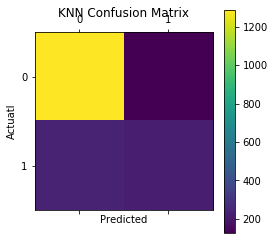

In [69]:
#Visualizing the confusion Matrix
import pylab as plt
%matplotlib inline
plt.matshow(knncm)
plt.title('KNN Confusion Matrix')
plt.colorbar()
plt.ylabel('Actuatl')
plt.xlabel('Predicted')
plt.show()

In [70]:
# Compute the average accuracy score for training data
print(knnclf.score(adult_train_norm, adult_target_train))

0.8435383185017931


In [71]:
# Compute the average accuracy score for Test data
print(knnclf.score(adult_test_norm, adult_target_test))

0.8035050451407328


Next, experiment with different values of K (say from 5 to 100) and the weight parameter (i.e., with or without distance weighting) to see if you can improve accuracy of the KNN classifier. Show the results in a single plot comparing distance and uniform weighting schemes across the different values of K. Use the best values of these parameter (K and weighting scheme) to train a new KNN classifier and report the accuracy of this classifier on the training and test sets.

In [72]:
def diffK(adult_test_norm, adult_target_test, adult_train_norm, adult_target_train):
    accuracy= np.zeros([100,5], dtype = float)
    index=0
    for K in range(1,101):
        knnclf = neighbors.KNeighborsClassifier(K)
        knnclf.fit(adult_train_norm, adult_target_train)
        accuracy_noWeight_train =(knnclf.score(adult_train_norm, adult_target_train))
        accuracy_noWeight_test =(knnclf.score(adult_test_norm, adult_target_test))

        knnclf_dist = neighbors.KNeighborsClassifier(K, weights = 'distance')
        knnclf_dist.fit(adult_train_norm, adult_target_train)
        accuracy_distance_train =(knnclf_dist.score(adult_train_norm, adult_target_train))
        accuracy_distance_test =(knnclf_dist.score(adult_test_norm, adult_target_test))

        accuracy[index] = [K, accuracy_noWeight_train,accuracy_noWeight_test,  accuracy_distance_train, accuracy_distance_test]
        index +=1
    
    return accuracy

In [73]:
accuracy = diffK(adult_test_norm, adult_target_test, adult_train_norm, adult_target_train)

In [74]:
accuracyDF = pd.DataFrame(accuracy, columns = ['K', 'NoWeight Train', 'NoWeight Test','DistanceWeight Train', 'DistanceWeight Test',] )
accuracyDF.head()

,K,NoWeight Train,NoWeight Test,DistanceWeight Train,DistanceWeight Test
0,1.0,0.93,0.76,0.93,0.76
1,2.0,0.87,0.79,0.93,0.76
2,3.0,0.87,0.78,0.94,0.77
3,4.0,0.85,0.79,0.94,0.77
4,5.0,0.85,0.79,0.94,0.78


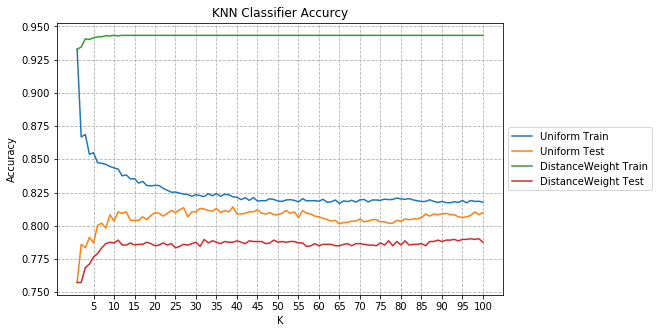

In [75]:
plt.figure(figsize=(8,5))

plt.plot(accuracyDF['K'], accuracyDF['NoWeight Train'], label ="Uniform Train")
plt.plot(accuracyDF['K'], accuracyDF['NoWeight Test'], label ="Uniform Test")

plt.plot(accuracyDF['K'], accuracyDF['DistanceWeight Train'], label ="DistanceWeight Train")
plt.plot(accuracyDF['K'], accuracyDF['DistanceWeight Test'], label ="DistanceWeight Test")

plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title("KNN Classifier Accurcy")

plt.grid(linestyle = '--')
plt.xticks(df['K'])
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.show()

In [76]:
#Uniform distance had the lesser gap between testing and training scores compared to distance weight
#There fore uniform diatance has less chances of getting overfit
#K= 27 has the highest accuracy for uniform distance for the smallest K
K = 27
knnclf = neighbors.KNeighborsClassifier(K)
knnclf.fit(adult_train_norm, adult_target_train)
train_accuracy = knnclf.score(adult_train_norm, adult_target_train)
test_accuracy = knnclf.score(adult_test_norm, adult_target_test)
print("Training Accuracy when K=4: " + str(train_accuracy))
print("Testing Accuracy when K=4: " + str(test_accuracy))

Training Accuracy when K=4: 0.8237481737282507
Testing Accuracy when K=4: 0.813595326606479


Next, using only "uniform" weights, compare the accuracy of the KNN classifier across the different values of K on the training and the test data. You should show the results in a single figure with two line plots for the test and training accuracy values (y-axis) and with values of K in the x-axis. What range of values of K represent overfitting? Briefly explain.

In [77]:
def knn_test_trainAccuract(adult_test_norm, adult_target_test, adult_train_norm, adult_target_train):
    accuracy= np.zeros([100,3], dtype = float)
    index=0
    for K in range(1,101):
        knnclf_train = neighbors.KNeighborsClassifier(K)
        knnclf_train.fit(adult_train_norm, adult_target_train)
        accuracy_train =(knnclf_train.score(adult_train_norm, adult_target_train))

        knnclf_test = neighbors.KNeighborsClassifier(K)
        knnclf_test.fit(adult_test_norm, adult_target_test)
        accuracy_test =(knnclf_train.score(adult_test_norm, adult_target_test))

        accuracy[index] = [K, accuracy_train, accuracy_test]
        index +=1
    
    return accuracy

In [78]:
accuracy = knn_test_trainAccuract(adult_test_norm, adult_target_test, adult_train_norm, adult_target_train)

In [79]:
accuracy_train_test = pd.DataFrame(accuracy, columns = ['K', 'Training Accuracy', 'Testing Accuracy'] )
accuracy_train_test.head()

,K,Training Accuracy,Testing Accuracy
0,1.0,0.93,0.76
1,2.0,0.87,0.79
2,3.0,0.87,0.78
3,4.0,0.85,0.79
4,5.0,0.85,0.79


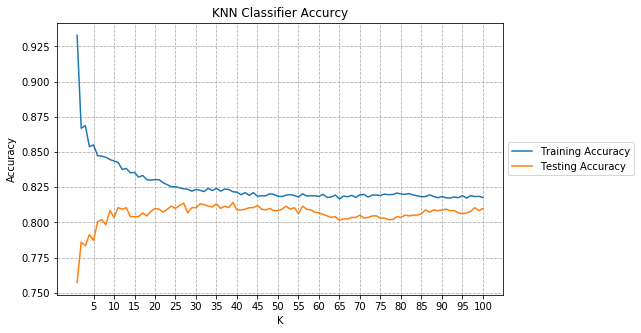

In [80]:
plt.figure(figsize=(8,5))
plt.plot(accuracy_train_test['K'], accuracy_train_test['Training Accuracy'], label ="Training Accuracy")
plt.plot(accuracy_train_test['K'], accuracy_train_test['Testing Accuracy'], label ="Testing Accuracy")
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title("KNN Classifier Accurcy")
plt.grid(linestyle = '--')
plt.xticks(df['K'])
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.show()

As the value of K increases, the gap between training and testing seems to getting smaller, reflecting less over fitting.
K Values from 3-20 seem to have overfitting by 1% +/- 1.5%.

# 2c

Using the non-normalized training and test data, perform classification using scikit-learn's decision tree classifier (using the default parameters). As above, generate the confusion matrix, classification report, and average accuracy scores of the classifier. Compare the average accuracy score on the test and the training data sets. What does the comparison tell you in terms of bias-variance trade-off? Next, create another decision tree model (trained on the non-normalized training data) using "gini" index as the selection criteria, min_samples_split=10, and max_depth=4. Show the accuracy results for both the training and test sets. For this model generate a visualization of tree embedded in the Jupyter Notebook

In [81]:
dtreeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=3)

In [82]:
dtreeclf = dtreeclf.fit(adult_train, adult_target_train)

In [83]:
treepreds_test = dtreeclf.predict(adult_test)
print(treepreds_test)

[0 0 0 ... 0 0 0]


In [84]:
print(dtreeclf.score(adult_test, adult_target_test))

0.761019649495486


In [85]:
print(dtreeclf.score(adult_train, adult_target_train))

0.9305352636472307


In [86]:
print(classification_report(adult_target_test, treepreds_test))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1417
           1       0.52      0.45      0.48       466

    accuracy                           0.76      1883
   macro avg       0.67      0.66      0.66      1883
weighted avg       0.75      0.76      0.75      1883



In [87]:
tree_cm = confusion_matrix(adult_target_test, treepreds_test)
print(tree_cm)

[[1225  192]
 [ 258  208]]


There is a gap of 18% between testing and training accuracy.There was a high bias for one class comapred to the other. The Decision tree is overfitting. 

In [88]:
dtreeclf2 = tree.DecisionTreeClassifier(criterion ='gini', min_samples_split = 10, max_depth =4)

In [89]:
dtreeclf2 = treeclf2.fit(adult_train, adult_target_train)

In [90]:
treepreds_test2 = dtreeclf2.predict(adult_test)
print(treepreds_test2)

[0 0 0 ... 0 0 0]


In [91]:
print(dtreeclf2.score(adult_test, adult_target_test))

0.8130642591609134


In [92]:
print(dtreeclf2.score(adult_train, adult_target_train))

0.817638464603533


In [93]:
print(classification_report(adult_target_test, treepreds_test2))

              precision    recall  f1-score   support

           0       0.84      0.94      0.88      1417
           1       0.69      0.44      0.54       466

    accuracy                           0.81      1883
   macro avg       0.76      0.69      0.71      1883
weighted avg       0.80      0.81      0.80      1883



In [94]:
tree_cm2 = confusion_matrix(adult_target_test, treepreds_test2)
print(tree_cm2)

[[1327   90]
 [ 262  204]]


In [96]:
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

tree = export_graphviz(dtreeclf2, out_file=None, feature_names= adult_train.columns, class_names=['0','1'])
graph = Source(tree)

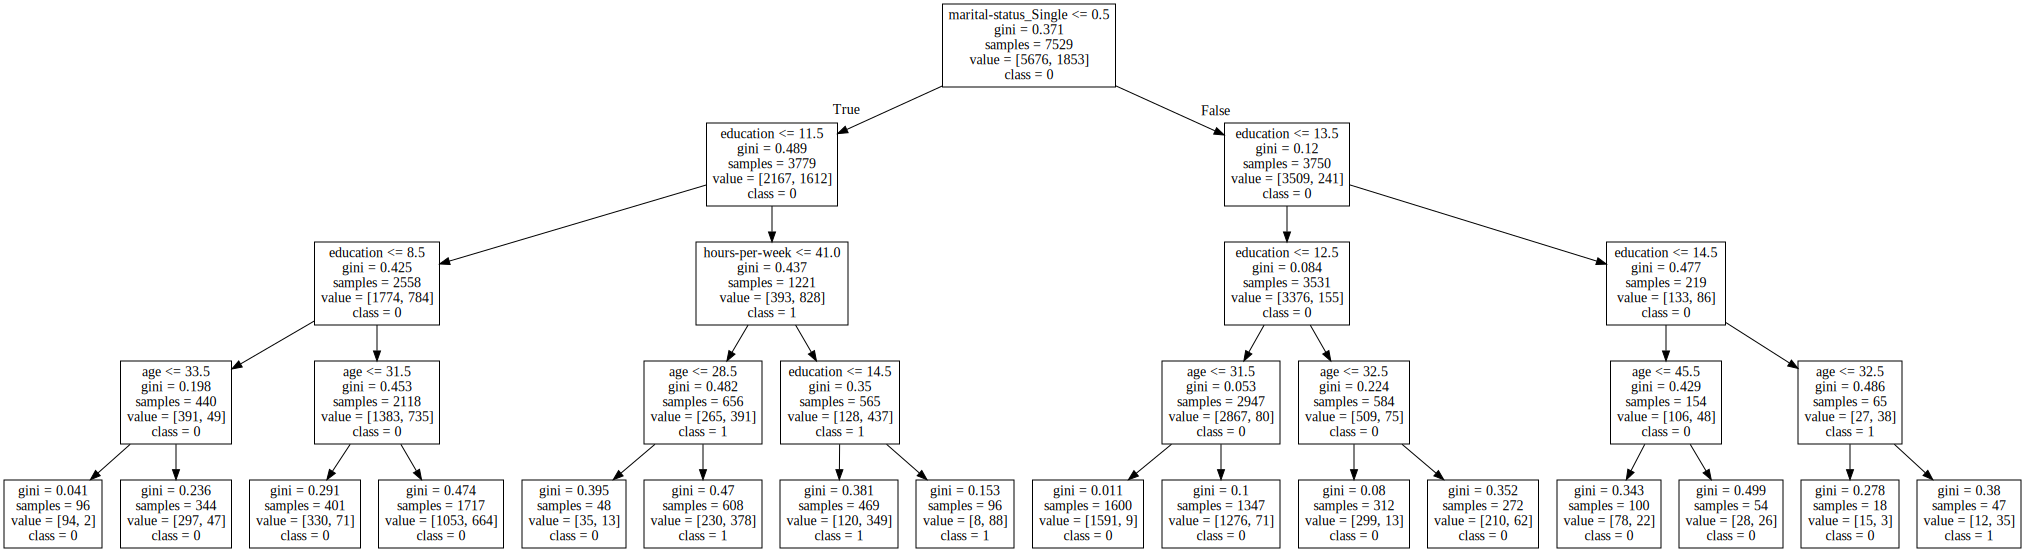

In [97]:
display(SVG(graph.pipe(format = 'svg')))

# 2d

Use scikit-learn to build classifiers using Naive Bayes (Gaussian) and linear discriminant analysis (LDA).  For each of these perform 10-fold cross-validation on the 80% training data (using cross-validation module in scikit-learn) and report the overall average accuracy. Compare this cross-validation accuracy to the model accuracy on the training data as a whole. Finally, run your model on the set-aside 20% test data.

In [98]:
from sklearn.model_selection import cross_val_score

nb_clf = naive_bayes.GaussianNB()
nb_clf = nb_clf.fit(adult_train, adult_target_train)
print("Score on Training: ", nb_clf.score(adult_train, adult_target_train))
print("Score on Test: ", nb_clf.score(adult_test, adult_target_test))

Score on Training:  0.7218754150617612
Score on Test:  0.7110993096123208


In [99]:
cv_scores = cross_val_score(nb_clf, adult_train, adult_target_train, cv=5)
print(cv_scores)

[0.71 0.71 0.74 0.71 0.72]


In [100]:
print("Overall Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

Overall Accuracy: 0.72 (+/- 0.02)


In [101]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

ldaclf = LinearDiscriminantAnalysis()
ldaclf = ldaclf.fit(adult_train, adult_target_train)
ldpreds_test = ldaclf.predict(adult_test)
print(ldapreds_test)

[0 0 0 ... 0 0 0]


C:\Users\razia\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [102]:
print(ldaclf.score(adult_train, adult_target_train))

0.8115287554788152


In [103]:
print(ldaclf.score(adult_test, adult_target_test))

0.7992565055762082


In [104]:
cv_scoresLDtrain = cross_val_score(ldaclf, adult_train, adult_target_train, cv=5)
print(cv_scoresLDtrain)

[0.81 0.81 0.81 0.8  0.82]


C:\Users\razia\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\razia\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\razia\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\razia\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\razia\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [105]:
print("Overall Accuracy for training: %0.2f (+/- %0.2f)" % (cv_scoresLDtrain.mean(), cv_scores.std() * 2))

Overall Accuracy for training: 0.81 (+/- 0.02)


In [106]:
cv_scoresLDtest = cross_val_score(ldclf, adult_test, adult_target_test, cv=5)

C:\Users\razia\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\razia\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\razia\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\razia\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\razia\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [107]:
print("Overall Accuracy for testing: %0.2f (+/- %0.2f)" % (cv_scoresLDtest.mean(), cv_scores.std() * 2))

Overall Accuracy for testing: 0.80 (+/- 0.02)
